In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


IMPORTING DATASET AND DATA PREPROCESSING

In [19]:
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [20]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [21]:
car_dataset.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [22]:
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [23]:
car_dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [24]:
car_dataset.shape

(4340, 8)

In [25]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


CHECHKING THE DISTRIBUTION OF CATEGORICAL DATA

In [26]:
print(car_dataset.fuel.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64


In [27]:
print(car_dataset.seller_type.value_counts())

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


In [28]:
print(car_dataset.transmission.value_counts())

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


In [39]:
print(car_dataset.owner.value_counts())

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


ENCODING THE CATEGORICAL DATA

In [50]:
#fuel column
car_dataset.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

#seller
car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

#trasmission
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

#owner
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

/tmp/ipython-input-50-1254756164.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)


In [51]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


splitting the data into target

```
# This is formatted as code
```



In [52]:
x = car_dataset.drop(['name','selling_price'],axis=1)
y = car_dataset['selling_price']

In [53]:
print(x)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]


In [54]:
print(y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


splitting the data into training and testing set

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state=2)

model training

linear regression


In [56]:
lin_reg_model = LinearRegression()

In [57]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [58]:
training_data_prediction = lin_reg_model.predict(x_train)

In [60]:
#R SQUARED ERROR
error_score = metrics.r2_score(y_train, training_data_prediction)
print(error_score)

0.4430787587921934


visualize the actual price and predicted price

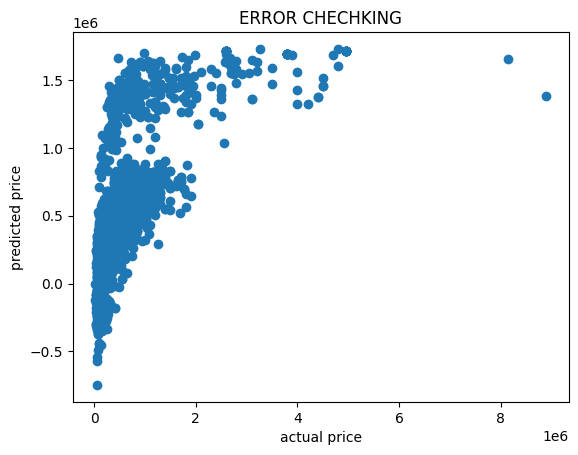

In [61]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('ERROR CHECHKING')
plt.show()

In [62]:
test_data_prediction = lin_reg_model.predict(x_test)

In [63]:
#R SQUARED ERROR
error_score = metrics.r2_score(y_test, test_data_prediction)
print(error_score)

0.5212912933220211


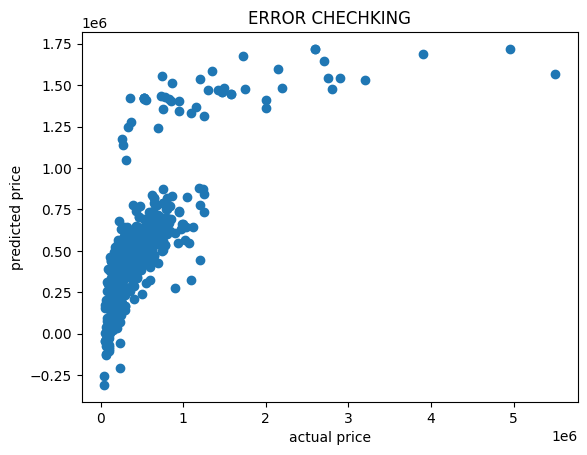

In [64]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('ERROR CHECHKING')
plt.show()

Lasso Regression

In [65]:
lasso_reg_model = Lasso()

In [66]:
lasso_reg_model.fit(x_train,y_train)

Lasso()

In [69]:
lasso_data_prediction = lasso_reg_model.predict(x_train)

In [70]:
#R SQUARED ERROR
error_score = metrics.r2_score(y_train, lasso_data_prediction)
print(error_score)

0.4430787587404139


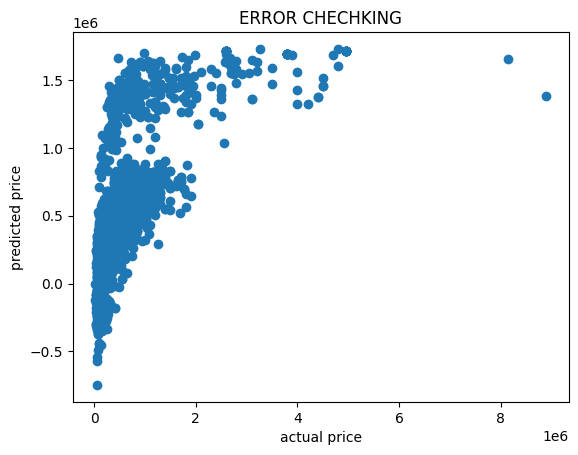

In [71]:
plt.scatter(y_train, lasso_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('ERROR CHECHKING')
plt.show()

In [72]:
test_data_prediction = lasso_reg_model.predict(x_test)

In [73]:
#R SQUARED ERROR
error_score = metrics.r2_score(y_test, test_data_prediction)
print(error_score)

0.5212906062492373


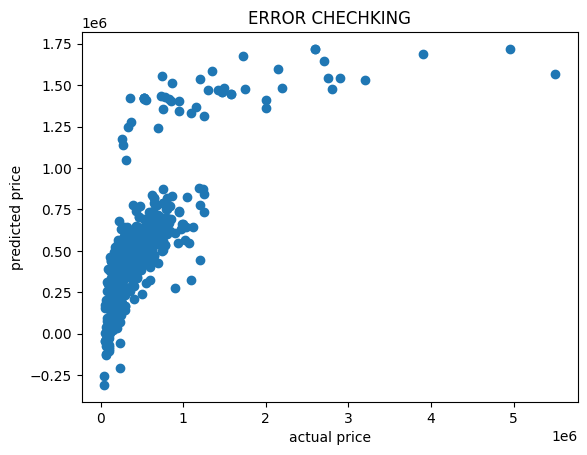

In [74]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('ERROR CHECHKING')
plt.show()